<a href="https://colab.research.google.com/github/arnabsaha7/Parkinson-Disease-Prediction/blob/main/Parkinson_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score as ras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from tqdm.notebook import tqdm

import warnings
warnings.filterwarnings('ignore')

# Data

In [ ]:
df = pd.read_csv('/content/pd_speech_features.csv')

In [ ]:
df.shape

(756, 755)

In [ ]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [ ]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


# Data Cleaning

In [ ]:
df = df.groupby('id').mean().reset_index()
df.drop('id', axis=1, inplace=True)

In [ ]:
columns = list(df.columns)
for col in columns:
	if col == 'class':
		continue

	filtered_columns = [col]
	for col1 in df.columns:
		if((col == col1) | (col == 'class')):
			continue

		val = df[col].corr(df[col1])

		if val > 0.7:
			# If the correlation between the two
			# features is more than 0.7 remove
			columns.remove(col1)
			continue
		else:
			filtered_columns.append(col1)

	# After each iteration filter out the columns
	# which are not highly correlated features.
	df = df[filtered_columns]
df.shape


(252, 287)

In [ ]:
X = df.drop('class', axis=1)
X_norm = MinMaxScaler().fit_transform(X)
selector = SelectKBest(chi2, k=30)
selector.fit(X_norm, df['class'])
filtered_columns = selector.get_support()
filtered_data = X.loc[:, filtered_columns]
filtered_data['class'] = df['class']
df = filtered_data
df.shape

(252, 31)

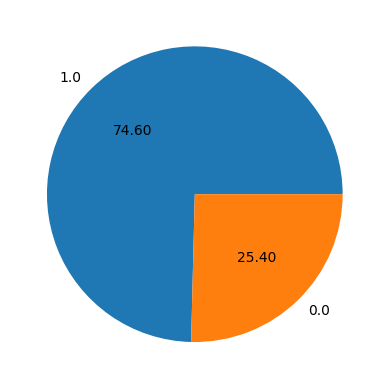

In [ ]:
x = df['class'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%.2f')
plt.show()

# Model Training

In [ ]:
features = df.drop('class', axis=1)
target = df['class']

xtrain, xtest, ytrain, ytest = tts(features, target, test_size=0.2, random_state=10)
xtrain.shape, xtest.shape

((201, 30), (51, 30))

In [ ]:
# Handling the data imbalance problem
# by using the over-sampling method on the minority class.

ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=0)
x , y = ros.fit_resample(xtrain, ytrain)
x.shape, y.shape

((302, 30), (302,))

In [ ]:
models = [LogisticRegression(),
          XGBClassifier(),
          SVC(kernel='rbf', probability=True)]

for i in range(len(models)):
  models[i].fit(x,y)
  print(f'{models[i]} : ')

  tpred = models[i].predict_proba(x)[:, 1]
  print('Training Accuracy: ', ras(y, tpred))

  vpred = models[i].predict_proba(xtest)[:, 1]
  print('Validation Accuracy : ', ras(ytest, vpred))
  print()

LogisticRegression() : 
Training Accuracy:  0.8306214639708784
Validation Accuracy :  0.8127413127413127

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy:  0.9999999999999999
Validation Accuracy :  0.7857142857142857

SVC(probability=True) : 
Training Accuracy:  0.7105

From the above score, we conclude that Logistic regression performed better.

[[10  4]
 [ 2 35]]


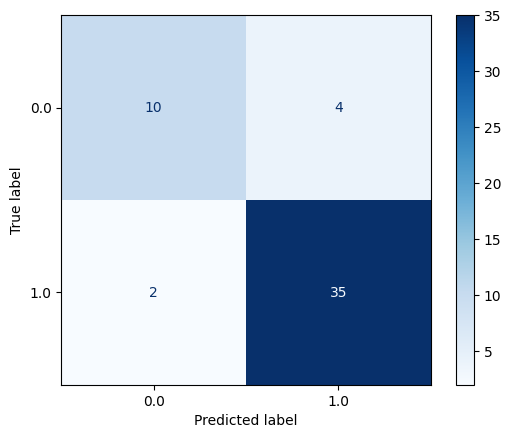

In [ ]:
disp = ConfusionMatrixDisplay.from_estimator(
    models[0],
    xtest, ytest,
    cmap=plt.cm.Blues)

print(disp.confusion_matrix)

plt.show()

In [ ]:
print(metrics.classification_report(ytest,
                                    models[0].predict(xtest)))

              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77        14
         1.0       0.90      0.95      0.92        37

    accuracy                           0.88        51
   macro avg       0.87      0.83      0.85        51
weighted avg       0.88      0.88      0.88        51



# **Final Accuracy ~ 88%**